In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import seaborn as sns 
import sklearn
from scipy import stats
import scipy
import pywt
from sklearn import svm

In [2]:
data=pd.read_csv('D:\REPO_progetto\TesiBiomedica\ERP_SUB',header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,epochs_1-epo.fif,Animali,-0.160141,-0.125426,-0.106573,-0.095095,-0.091029,-0.069748,-0.046371,-0.043094,...,-0.235281,-0.265519,-0.309145,-0.328534,-0.359613,-0.385610,-0.394247,-0.392418,-0.411500,-0.421206
1,epochs_1-epo.fif,Uomini,0.047744,0.026293,0.017957,0.021190,0.011729,-0.003821,-0.025260,-0.037525,...,-0.254461,-0.254013,-0.255682,-0.262205,-0.259558,-0.232320,-0.223093,-0.223084,-0.211410,-0.220349
2,epochs_2-epo.fif,Animali,-0.026694,-0.066588,-0.066975,0.046482,0.118679,0.127005,0.181460,0.129232,...,-0.342489,-0.412722,-0.378892,-0.384511,-0.420109,-0.464766,-0.426704,-0.347167,-0.295815,-0.200058
3,epochs_2-epo.fif,Uomini,0.029168,0.065381,0.057637,-0.062285,-0.150145,-0.148228,-0.124404,-0.093445,...,0.960847,0.974537,1.000000,0.996834,0.999565,0.958478,0.911210,0.897387,0.872463,0.882848
4,epochs_4-epo.fif,Animali,-0.299590,-0.287230,-0.194026,-0.149032,-0.124823,-0.142696,-0.209465,-0.069586,...,-0.952257,-0.945174,-0.887842,-0.914772,-0.822240,-0.697577,-0.599426,-0.639034,-0.660664,-0.675160


In [3]:
#elimino le prime due colonne 
data.drop(data.columns[0], axis=1, inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,2,3,4,5,6,7,8,9,10,11,...,261,262,263,264,265,266,267,268,269,270
0,-0.160141,-0.125426,-0.106573,-0.095095,-0.091029,-0.069748,-0.046371,-0.043094,-0.032259,-0.001245,...,-0.235281,-0.265519,-0.309145,-0.328534,-0.359613,-0.385610,-0.394247,-0.392418,-0.411500,-0.421206
1,0.047744,0.026293,0.017957,0.021190,0.011729,-0.003821,-0.025260,-0.037525,-0.037516,-0.045217,...,-0.254461,-0.254013,-0.255682,-0.262205,-0.259558,-0.232320,-0.223093,-0.223084,-0.211410,-0.220349
2,-0.026694,-0.066588,-0.066975,0.046482,0.118679,0.127005,0.181460,0.129232,0.099907,0.144923,...,-0.342489,-0.412722,-0.378892,-0.384511,-0.420109,-0.464766,-0.426704,-0.347167,-0.295815,-0.200058
3,0.029168,0.065381,0.057637,-0.062285,-0.150145,-0.148228,-0.124404,-0.093445,-0.106196,-0.089565,...,0.960847,0.974537,1.000000,0.996834,0.999565,0.958478,0.911210,0.897387,0.872463,0.882848
4,-0.299590,-0.287230,-0.194026,-0.149032,-0.124823,-0.142696,-0.209465,-0.069586,0.080486,0.073727,...,-0.952257,-0.945174,-0.887842,-0.914772,-0.822240,-0.697577,-0.599426,-0.639034,-0.660664,-0.675160


In [4]:
#trasformo i dati in matrice numpy 
tab=np.array(data)

In [5]:
#ottengo gli indici 
Adx=np.arange(0,59,2)
Bdx=np.arange(1,60,2)

In [6]:
#ottengo i vettori animali e uomini
vett_animali=[tab[i]  for  i in Adx]
vett_uomini= [tab[i]  for  i in Bdx]

In [7]:
len(vett_animali)

30

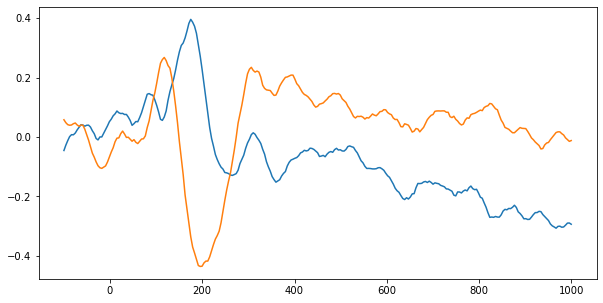

In [8]:
#Calcolo la media 
animali=0
uomini=0

for  i in range(29):
    animali=animali+vett_animali[i]
    uomini=uomini+vett_uomini[i]
    
animali=animali/30
uomini=uomini/30

#plotto i risultati
plt.figure(figsize = (10, 5))
x=np.linspace(-100,1000,269)
plt.plot(x,animali)
plt.plot(x,uomini)

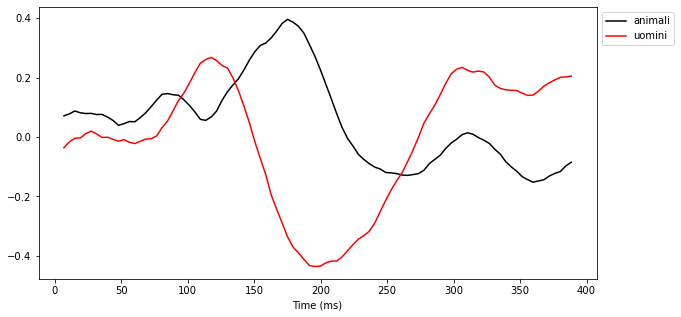

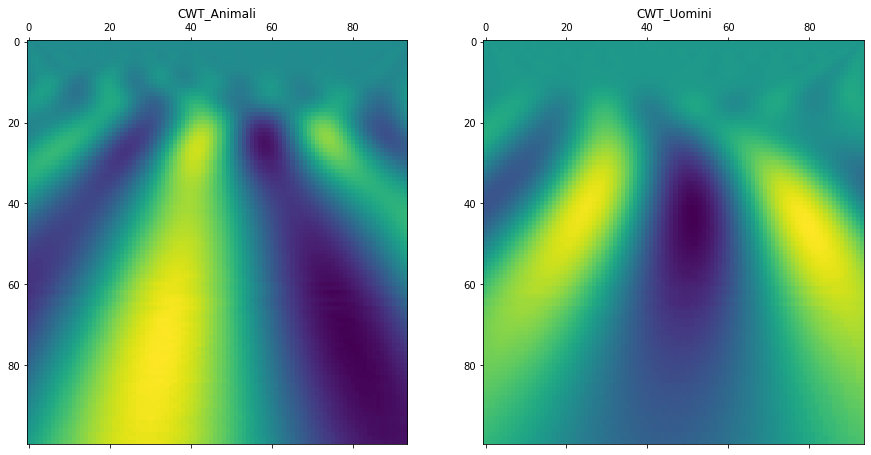

In [9]:
#Taglio il segnale a 400

animali_c=np.delete(animali,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])
uomini_c=np.delete(uomini,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])
x_c=np.delete(x,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])

#Plotto i risultati 
plt.figure(figsize = (10, 5))
plt.plot(x_c,animali_c,color='k', label = 'animali')
plt.plot(x_c,uomini_c,color='r',label = 'uomini')
plt.xlabel('Time (ms)')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')


#Calcolo la CWT per il segnale croppato 
cwt_animali=pywt.cwt(animali_c,np.arange(1,101),'morl')
cwt_uomini=pywt.cwt(uomini_c,np.arange(1,101),'morl')


#Plotto i risultati 

fig, axs = plt.subplots(1, 2,figsize=(15,15))
axs[0].matshow(cwt_animali[0]) # doctest: +SKIP
axs[0].set_title('CWT_Animali')
axs[1].matshow(cwt_uomini[0]) # doctest: +SKIP
axs[1].set_title('CWT_Uomini')
plt.show()

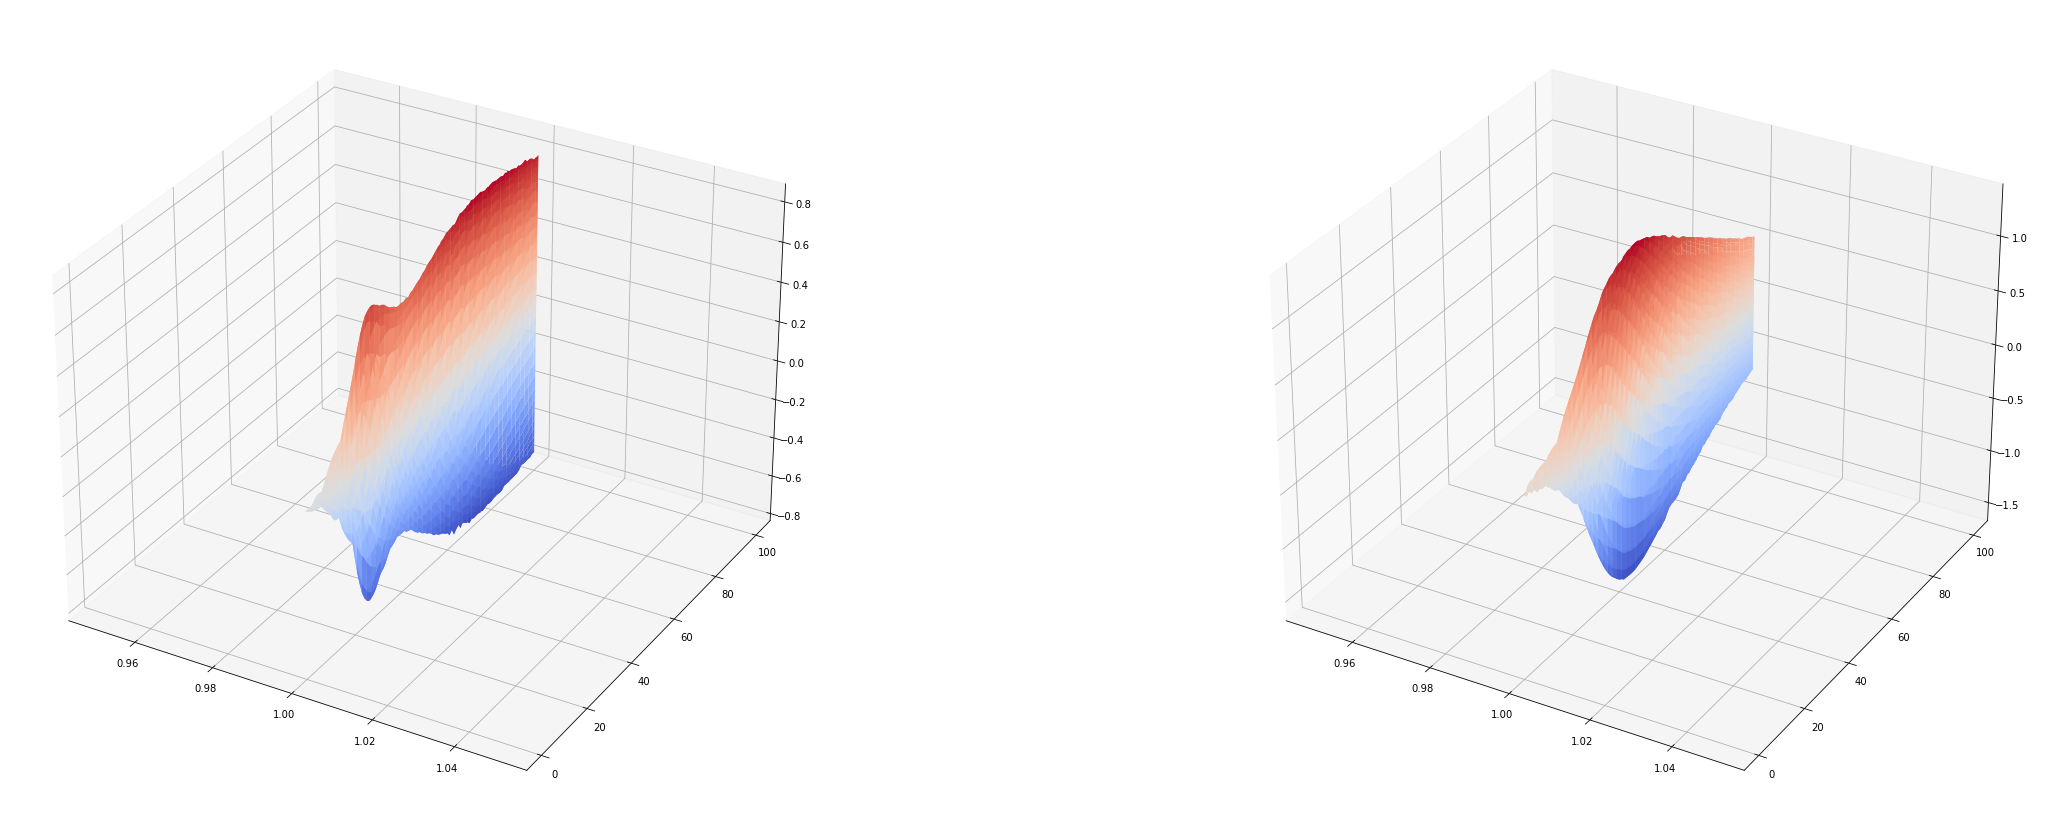

In [216]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig=plt.figure(figsize=(40,15))
ax1=fig.add_subplot(1,2,1, projection='3d')
y=np.arange(1,101)
x=np.arange(1,len(cwt_animali),1)
            
x, y =np.meshgrid(x,y)


ax1.plot_surface(x,y,cwt_animali[0],cmap=cm.coolwarm,linewidth=0,antialiased=True)

ax2=fig.add_subplot(1,2,2, projection='3d')
ax2.plot_surface(x,y, cwt_uomini[0],cmap=cm.coolwarm,linewidth=0,antialiased=True)

plt.show()

In [10]:
vett_animali_c=[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])for i in vett_animali ]
vett_uomini_c =[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)]) for i in vett_uomini]

#calcolo le CWT per ogni categoria 
cwt_animali_vector=[pywt.cwt(i,np.arange(1,101),'morl')for  i in vett_animali_c]
cwt_uomini_vector =[pywt.cwt(i,np.arange(1,101),'morl')for  i in vett_uomini_c]

In [11]:
features_a=[cwt_animali_vector[i][0].flatten() for  i in range(len(vett_uomini_c))]
features_u=[cwt_uomini_vector[i][0].flatten()  for  i in range(len(vett_uomini_c))]

In [12]:
#Lo salvo come pandas 
df1 = pd.DataFrame (features_a)
df2 = pd.DataFrame (features_u)
frames = [df1, df2]
df = pd.concat(frames)

In [13]:
#applico PCA
from sklearn.preprocessing import StandardScaler
df=StandardScaler().fit_transform(df) 

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc 1','pc2'])

In [15]:
a_type=np.zeros(30, dtype=int)
b_type=np.ones(30, dtype=int)
type=np.concatenate((a_type,b_type))
principalDf.insert(0, "Type", type ,True)
principalDf.head(35)

,Type,pc 1,pc2
0,0,-38.853009,-49.058224
1,0,37.588543,13.793001
2,0,-26.209857,-20.790516
3,0,63.508636,27.242205
4,0,41.545897,27.603608
5,0,59.131919,39.590695
6,0,-17.174766,32.733454
7,0,60.454009,15.586111
8,0,60.883885,-17.135383
9,0,73.804128,29.080475


In [16]:
label= np.array(principalDf['Type'])
features= principalDf.drop('Type', axis = 1)

In [19]:
#cross validation scores
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, features, label, cv=10)

print(len(scores))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),scores.std()))

10
0.87 accuracy with a standard deviation of 0.18
